<a href="https://colab.research.google.com/github/Pathin220/4105_Project/blob/main/Project_3_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Machine Learning/DataSets/DataSet3/heart.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Mean Absolute Error: 7.09
Mean Squared Error: 75.44
Root Mean Squared Error: 8.69


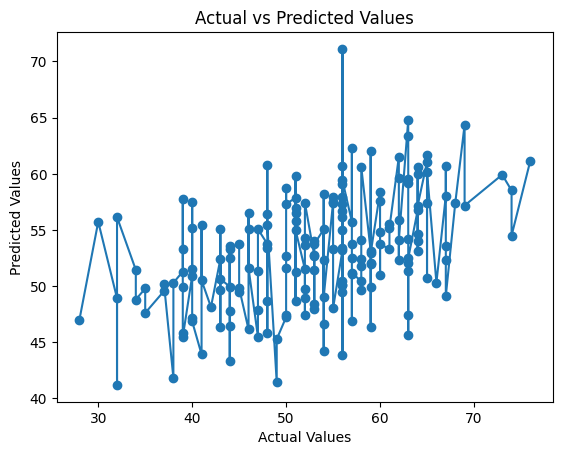

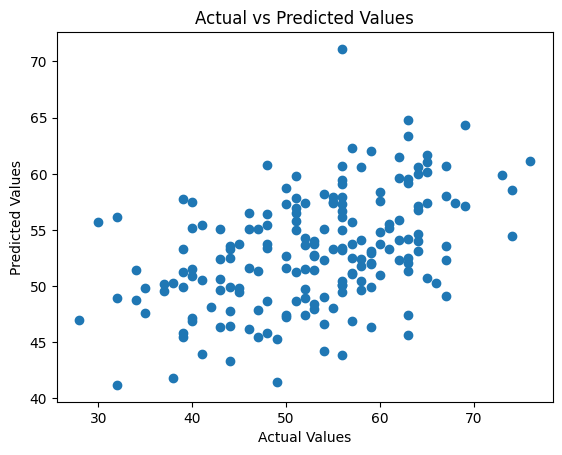

In [20]:
from sklearn.linear_model import LogisticRegression
# One-hot encode the columns
dataset = pd.get_dummies(dataset, columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope'], drop_first=True)

# Extract features and target
X = dataset.drop('Age', axis=1)
y = dataset['Age']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (optional but can be beneficial)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Mean Squared Error: {mse:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

# Plot the predicted vs actual values with a line plot
sorted_indices = np.argsort(y_test)
plt.plot(y_test.iloc[sorted_indices], y_pred[sorted_indices], linestyle='-', marker='o')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')


# Plot the predicted vs actual values
fig, a1x = plt.subplots()
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()